
# **Assignment - 3: Improving Graphs**

---
Course website: [SHALA-2020](https://shala2020.github.io/)

This assignment will get you familiarized with improving plots/graphs in Python. 

---
## Part 1 - Importing packages and loading data 
---

###Import the following libraries:  

* ```numpy``` with an alias name ```np```, 
* ```pandas``` with an alias name ```pd```, 
* ```matplotlib.pyplot``` with an alias name ```plt```, and 
* ```seaborn``` with an alias name ```sns```. 

*You are free to use any other popular libraries*. 

In [0]:
# Load the libraries with their aliases 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math


In [23]:
!git clone  https://github.com/shala2020/shala2020.github.io.git

Cloning into 'shala2020.github.io'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 432 (delta 4), reused 13 (delta 2), pack-reused 417
Receiving objects: 100% (432/432), 7.11 MiB | 31.77 MiB/s, done.
Resolving deltas: 100% (201/201), done.


### Using the files ```train.csv``` and ```moviesData.csv```,  peform the following:

* Load these file as ```pandas``` dataframes and store it in variables named ```train``` and ```movies``` respectively. 
* Print the first ten rows of ```train``` and last ten rows of ```movies```. 

In [0]:
# Load train.csv and movies.csv 
url_train = "https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/DataScience/L2/train.csv"
train = pd.read_csv(url_train)
train.head(10)
# Print the first ten rows of train



,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,1
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,2
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,3
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,4
5,32,0,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,No,13,3,3,0,8,2,2,7,7,3,6,5
6,59,0,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Yes,20,4,1,3,12,3,2,1,0,0,0,6
7,30,0,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,No,22,4,2,1,1,2,3,1,0,0,0,7
8,38,0,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,No,21,4,2,0,10,2,3,9,7,1,8,8
9,36,0,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,No,13,3,2,2,17,3,2,7,7,7,7,9


In [0]:
# Load movies.csv
url_movies = "https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Google_Colab_Notebooks/DataScience/L2/moviesData.csv"
movies = pd.read_csv(url_movies)
movies.tail(10)
# Print the last ten rows of movies 


,Unnamed: 0,title,title_type,genre,runtime,mpaa_rating,studio,thtr_rel_year,thtr_rel_month,thtr_rel_day,dvd_rel_year,dvd_rel_month,dvd_rel_day,imdb_rating,imdb_num_votes,critics_rating,critics_score,audience_rating,audience_score,best_pic_nom,best_pic_win,best_actor_win,best_actress_win,best_dir_win,top200_box,director,actor1,actor2,actor3,actor4,actor5
590,591,Funny Lady,Feature Film,Drama,136.0,PG,Columbia Pictures,1975,3,7,2002.0,2.0,5.0,6.4,3584,Rotten,38,Spilled,55,no,no,no,yes,no,no,Herbert Ross,Barbra Streisand,James Caan,Omar Sharif,Roddy McDowall,Ben Vereen
591,592,Capote,Feature Film,Drama,114.0,R,Sony Pictures Classics,2005,9,30,2006.0,3.0,14.0,7.4,96787,Certified Fresh,90,Upright,81,yes,no,yes,no,no,no,Bennett Miller,Philip Seymour Hoffman,Catherine Keener,Chris Cooper,Bruce Greenwood,Bob Balaban
592,593,Dead Men Don't Wear Plaid,Feature Film,Mystery & Suspense,88.0,PG,Universal Pictures,1982,5,21,1999.0,3.0,16.0,6.8,16366,Fresh,77,Upright,73,no,no,no,no,no,no,Carl Reiner,Steve Martin,Rachel Ward,Reni Santoni,Carl Reiner,George Gaynes
593,594,Tarzan,Feature Film,Drama,88.0,G,Buena Vista Pictures,1999,6,16,2000.0,1.0,1.0,7.2,134270,Certified Fresh,88,Upright,74,no,no,no,no,no,no,Chris Buck,Tony Goldwyn,Glenn Close,Minnie Driver,Rosie O'Donnell,Lance Henriksen
594,595,Cocoon: The Return,Feature Film,Drama,116.0,PG,Fox,1988,11,23,2004.0,6.0,1.0,5.2,11657,Rotten,36,Spilled,35,no,no,no,no,no,no,Daniel Petrie,Don Ameche,Wilford Brimley,Hume Cronyn,Jack Gilford,Steve Guttenberg
595,596,Death Defying Acts,Feature Film,Drama,97.0,PG,Genius Productions,2008,7,11,2008.0,10.0,28.0,5.9,8345,Rotten,44,Spilled,26,no,no,no,no,no,no,Gillian Armstrong,Guy Pearce,Catherine Zeta-Jones,Timothy Spall,Saoirse Ronan,Jack Bailey
596,597,Half Baked,Feature Film,Comedy,82.0,R,Universal Pictures,1998,1,16,1998.0,6.0,30.0,6.7,46794,Rotten,29,Upright,81,no,no,no,no,no,no,Tamra Davis,Dave Chappelle,Guillermo Diaz,Jim Breuer,Harland Williams,Rachel True
597,598,Dance of the Dead,Feature Film,Action & Adventure,87.0,R,Grindhouse Entertainment,2008,3,9,2008.0,10.0,14.0,5.9,10087,Fresh,80,Spilled,52,no,no,no,no,no,no,Gregg Bishop,Jared Kusnitz,Greyson Chadwick,Chandler Darby,Carissa Capobianco,Randy McDowell
598,599,Around the World in 80 Days,Feature Film,Action & Adventure,120.0,PG,Buena Vista Pictures,2004,6,16,2004.0,11.0,2.0,5.8,66054,Rotten,31,Spilled,34,no,no,no,no,no,yes,Frank Coraci,Jackie Chan,Steve Coogan,Ewen Bremner,Robert Fyfe,Ian McNeice
599,600,LOL,Feature Film,Comedy,97.0,PG-13,Lionsgate Films,2012,5,4,2012.0,7.0,31.0,4.2,43574,Rotten,17,Spilled,51,no,no,no,no,no,no,Liza Azuelos,Miley Cyrus,Demi Moore,Ashley Greene,Douglas Booth,Adam G. Sevani


---
## Part 2 - Drawing correlation and heatmap 
---

### Using the correlation matrix, peform the following:

* Find the correlation matrix for the ```movies```.  
* Draw a **heatmap** with the correlation matrix and display the values of correlation coefficients for each pair of features. Make sure the values are properly visible. You might want to adjust the figure size for this. 
* Create a ```mask``` to remove the duplicate values from the **heatmap**. 

In [0]:
# Find out the correlation matrix 
movies.corr()

,Unnamed: 0,runtime,thtr_rel_year,thtr_rel_month,thtr_rel_day,dvd_rel_year,dvd_rel_month,dvd_rel_day,imdb_rating,imdb_num_votes,critics_score,audience_score
Unnamed: 0,1.000000,-0.045146,-0.000639,0.005468,0.046227,-0.000382,-0.015944,0.024857,0.027596,0.045508,0.003937,0.012582
runtime,-0.045146,1.000000,-0.124754,0.215274,0.033998,-0.088603,-0.036916,0.021001,0.261153,0.342462,0.169494,0.172237
thtr_rel_year,-0.000639,-0.124754,1.000000,-0.026465,0.089811,0.655967,0.038498,-0.014895,-0.040544,0.152530,-0.096445,-0.062610
thtr_rel_month,0.005468,0.215274,-0.026465,1.000000,0.105620,-0.017549,-0.168568,0.038263,0.081638,0.101305,0.047717,0.034901
thtr_rel_day,0.046227,0.033998,0.089811,0.105620,1.000000,0.025283,-0.011816,-0.005932,0.035423,0.069750,0.023837,0.033812
dvd_rel_year,-0.000382,-0.088603,0.655967,-0.017549,0.025283,1.000000,0.000762,-0.074623,-0.024504,0.083158,0.009554,-0.073794
dvd_rel_month,-0.015944,-0.036916,0.038498,-0.168568,-0.011816,0.000762,1.000000,-0.023765,0.077333,0.048846,0.041502,0.070543
dvd_rel_day,0.024857,0.021001,-0.014895,0.038263,-0.005932,-0.074623,-0.023765,1.000000,0.020661,-0.027787,-0.024717,0.019294
imdb_rating,0.027596,0.261153,-0.040544,0.081638,0.035423,-0.024504,0.077333,0.020661,1.000000,0.327647,0.770764,0.865149
imdb_num_votes,0.045508,0.342462,0.152530,0.101305,0.069750,0.083158,0.048846,-0.027787,0.327647,1.000000,0.200657,0.288328


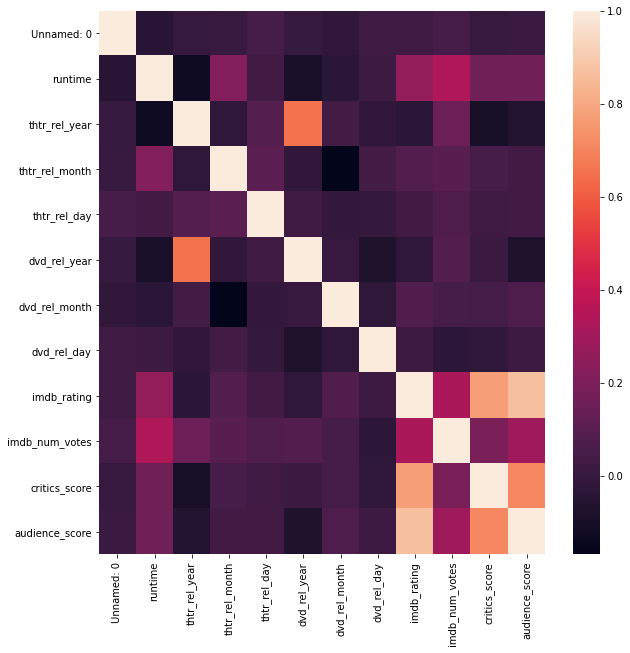

In [0]:
# Draw the heatmap 
plt.figure(figsize=(10,10))
sns.heatmap(movies.corr())



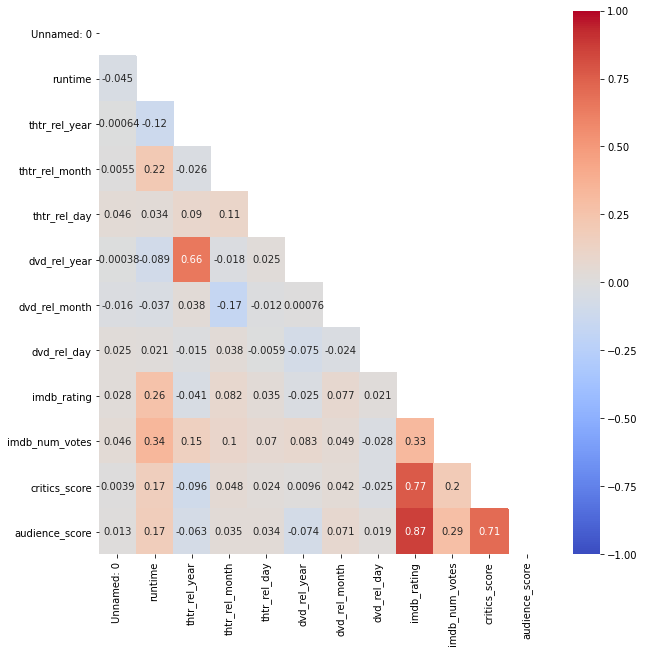

In [0]:
# Creating a mask for removing duplicates 
movies_corr = movies.corr()
plt.figure(figsize=(10,10))
mask = np.zeros(movies_corr.shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True
sns.heatmap(movies_corr, vmin = -1, cmap='coolwarm', annot=True, mask = mask)

---
## Part 3 - Drawing plots and customizing these 
---

### Using a histogram, peform the following:

* Draw a histogram of all the numeric features in ```train```. Please note that this can be done in a single command.  

* Find out whether there is any redundant features in ```train```, which can be dropped while building a model. 

In [0]:
%%time
train.head()

CPU times: user 539 µs, sys: 13 µs, total: 552 µs
Wall time: 561 µs


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,1
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,2
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,3
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,4


CPU times: user 713 ms, sys: 10.7 ms, total: 723 ms
Wall time: 727 ms


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fae2bf3b240>,
      dtype=object)

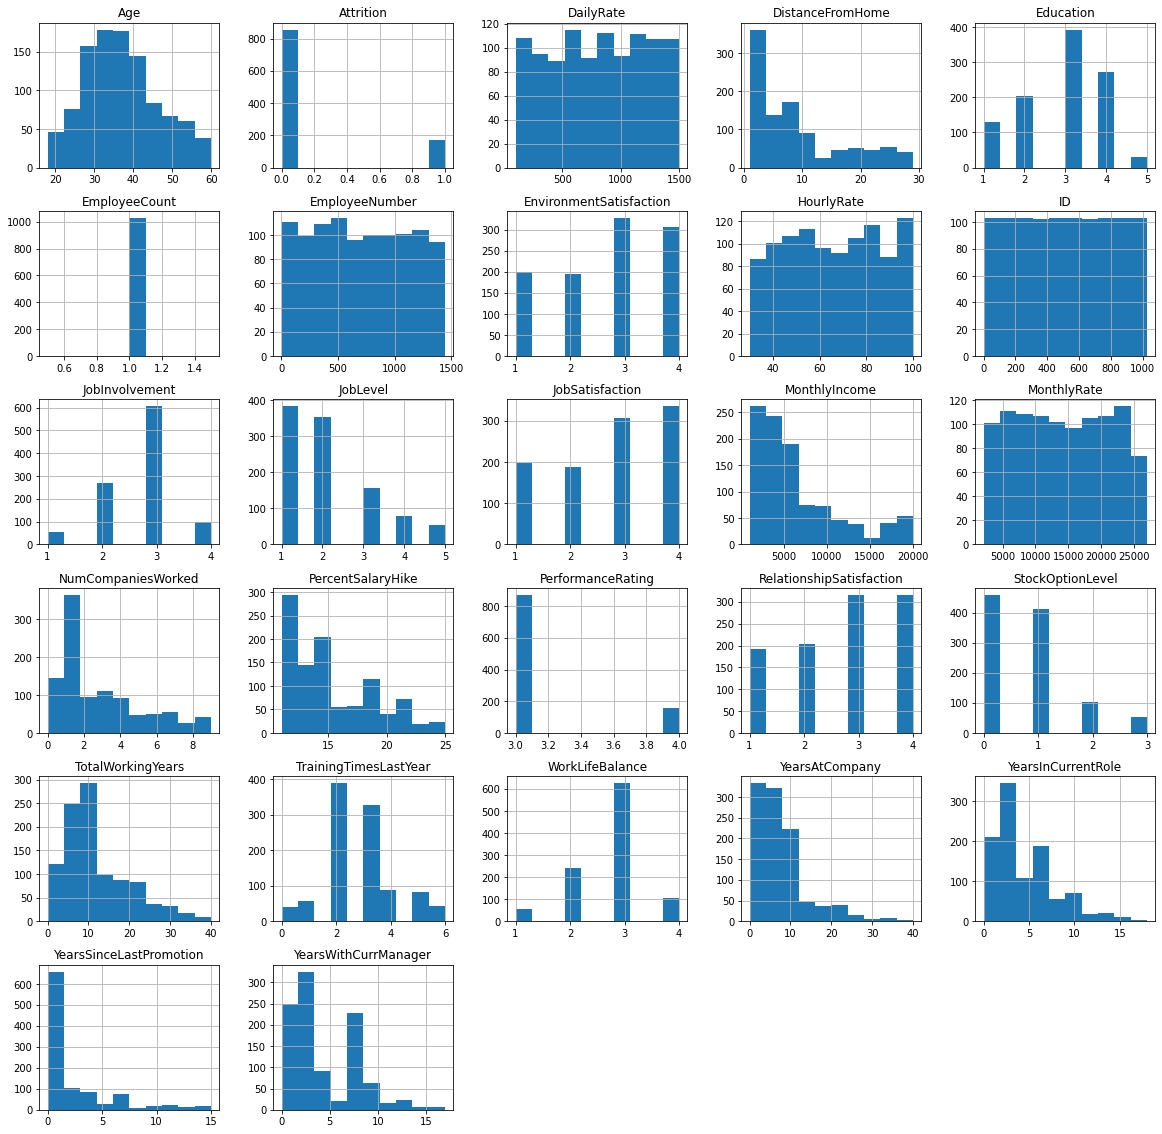

In [0]:
%%time
# Draw a histogram 
train.hist(figsize=(20,20))
# train.info

To compare get_numeric_data and hist , result: both of them return numerical plots, conclusion: df.hist() works well

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fed1af84cc0>,
      dtype=object)

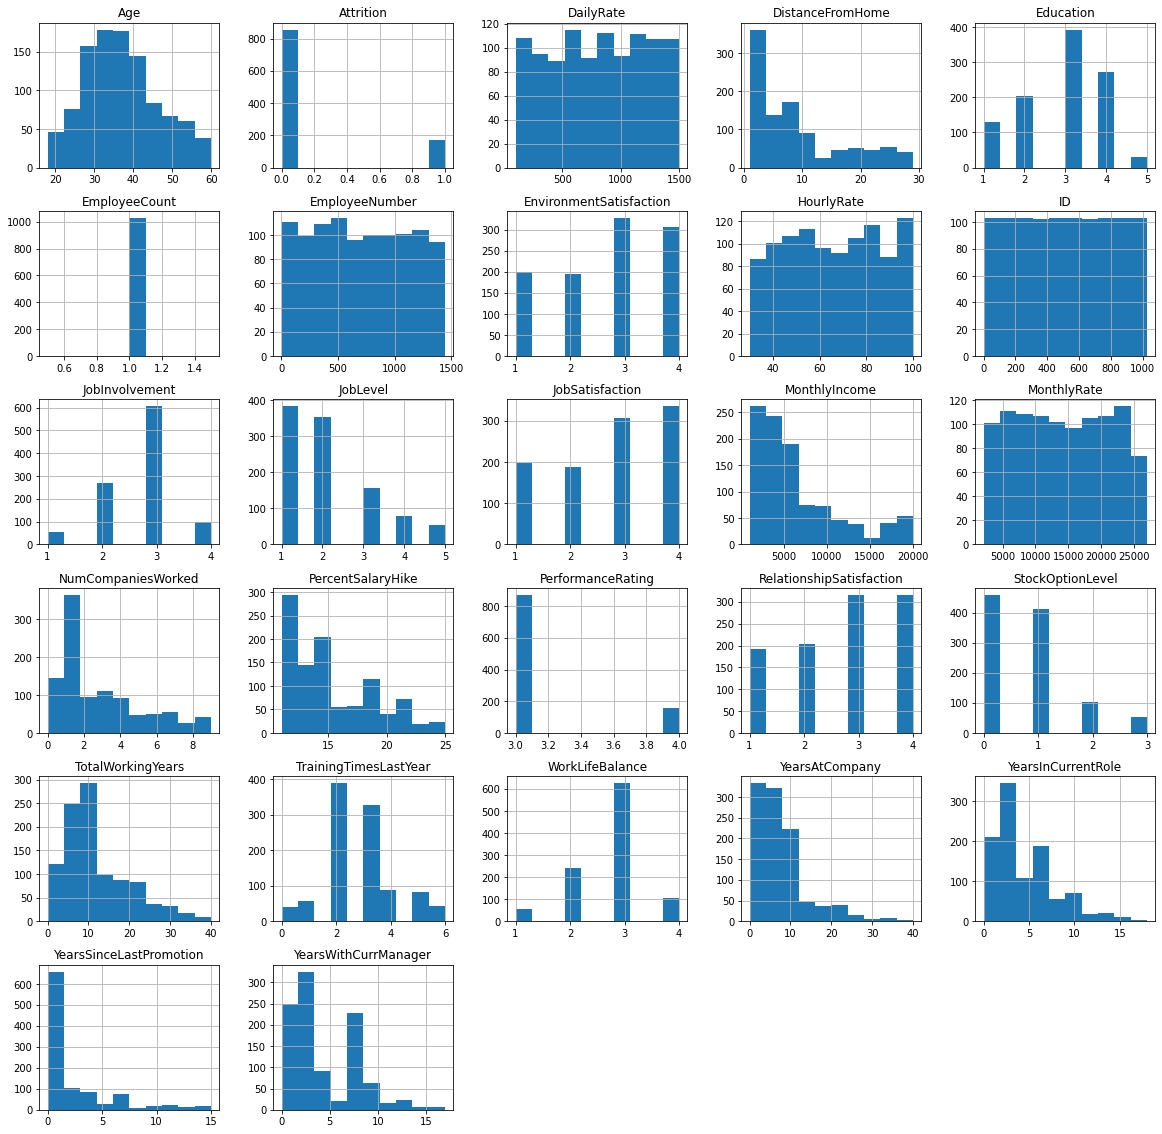

In [0]:
train_nu = train._get_numeric_data()
train_nu.hist(figsize=(20,20))

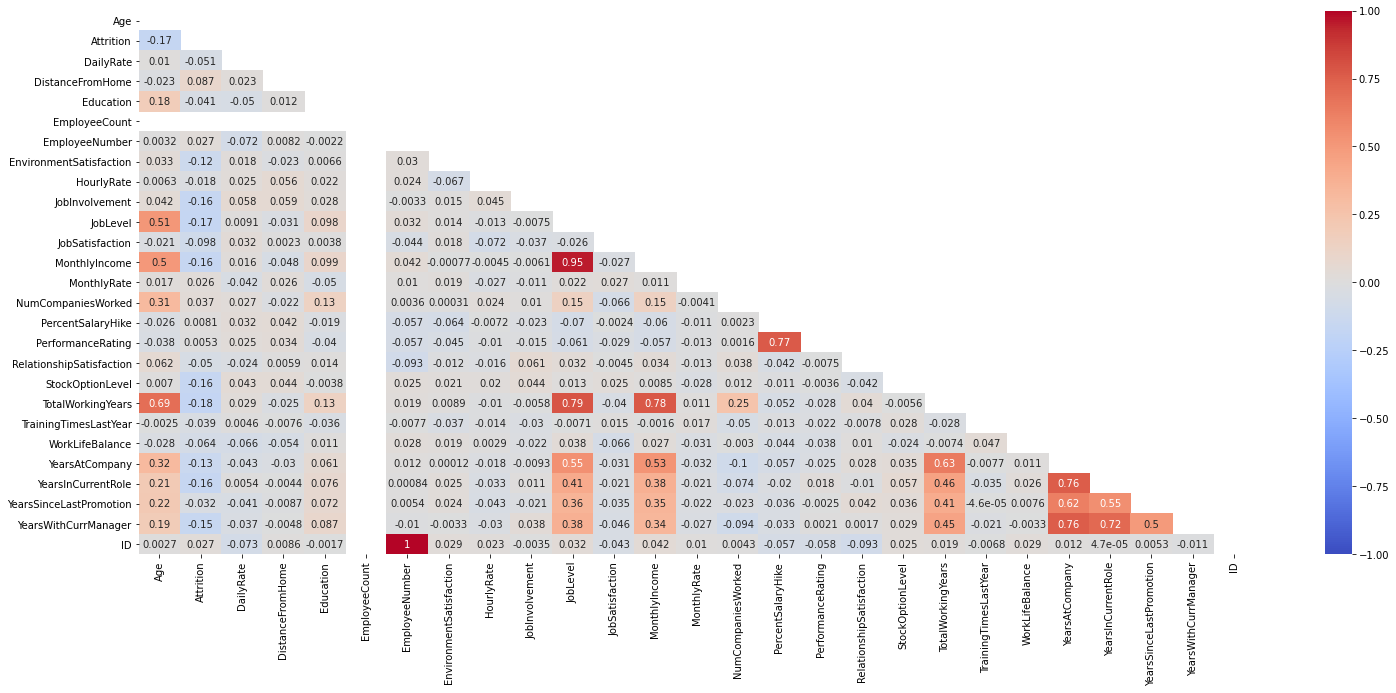

In [0]:
plt.figure(figsize=(25,10))
train_corr = train_nu.corr()
mask = np.zeros(train_corr.shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True
sns.heatmap(train_corr, vmin = -1, cmap='coolwarm', annot=True, mask = mask, )

In [0]:
%%time
sns.pairplot(train_nu)
#train_nu.head()

Output hidden; open in https://colab.research.google.com to view.

In [0]:
# Find out the redundant features 
dp = train.drop(columns=['EmployeeCount', 'ID'])
dp.info

<bound method DataFrame.info of       Age  Attrition  ... YearsSinceLastPromotion  YearsWithCurrManager
0      41          1  ...                       0                     5
1      49          0  ...                       1                     7
2      37          1  ...                       0                     0
3      33          0  ...                       3                     0
4      27          0  ...                       2                     2
...   ...        ...  ...                     ...                   ...
1023   56          0  ...                       1                     0
1024   47          0  ...                       5                     6
1025   24          0  ...                       0                     3
1026   32          0  ...                       0                     3
1027   34          0  ...                       0                     2

[1028 rows x 32 columns]>

### Using a scatter plot, perform the following:

* Draw a scatter plot between between ```imdb_rating``` and ```audience_score```, and also fit a regression line.
* Change the color of marker to red, size to 200, transparency to 0.3.    



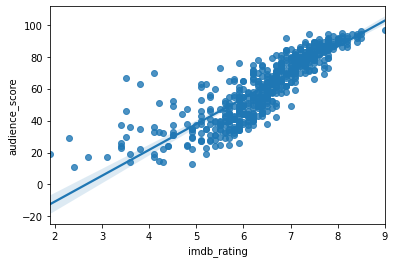

In [0]:
# Scatter plot to fit the regression line 
 sns.regplot(x="imdb_rating", y="audience_score", data=movies, ci = 95)

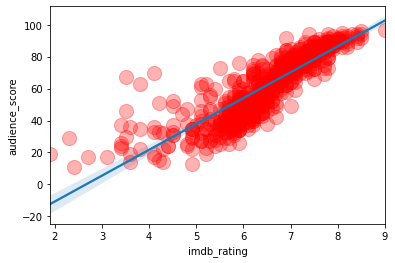

In [0]:
# Change marker of the scatter plot
sns.regplot(x="imdb_rating", y="audience_score", data=movies, ci = 95, marker="o", fit_reg=True, scatter_kws={"color":"red", "alpha":0.3, "s":200})
#marker="+", fit_reg=False, scatter_kws={"color":"red", "alpha":0.5, "s":100}

### Using a scatter plot, perform the following:

* Load the dataset ```iris```. This has been done for you.
* Draw a scatter plot between between ```petal_length``` and ```petal_width``` and color it according to the ```species```.
* Change the size of marker to 100 and place the legend in ```lower right```. 

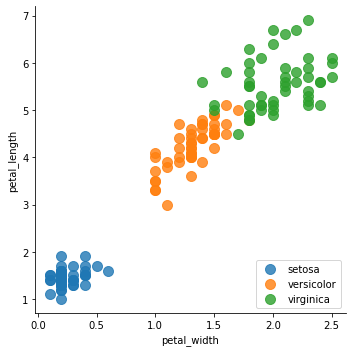

In [0]:
# library & dataset
import seaborn as sns
df = sns.load_dataset('iris')
 
# Use the 'hue' argument to provide a factor variable
sns.lmplot(x="petal_width", y="petal_length", data=df, fit_reg=False, hue='species', legend=False, scatter_kws={"s":100})
 
# Move the legend to an empty part of the plot

plt.legend(loc='lower right')

---
## Part 4 - Density Plots  
---

### Using density plots, perform the following:

* Load the dataset ```iris```. This has been done for you.
* Draw the density plots for all the features ```sepal_width```, ```sepal_length```, ```petal_width```, and ```petal_length```. You can required to use subplots for plotting all the density plots. 
* Try drawing a [CDF](https://en.wikipedia.org/wiki/Cumulative_distribution_function) of these features. There is a [blog on medium](https://medium.com/@rishav.jnit/exploratory-data-analysis-eda-on-iris-dataset-using-python-cadd850c1fc6) on how to plot CDF. It will be covered in tutorial. 

In [0]:
# library and dataset 
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


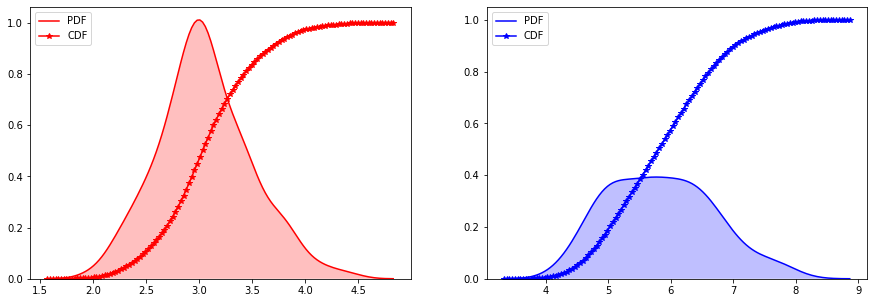

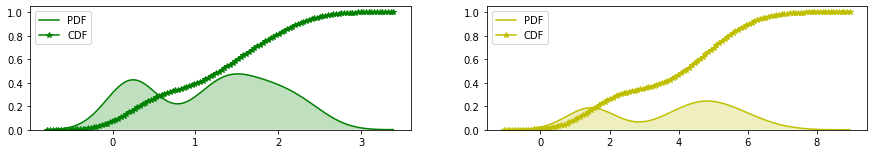

In [0]:
#density plot by using subplots
plt.figure(1,figsize=(15,5))
plt.subplot(1,2,1)
sns.kdeplot(df['sepal_width'], shade=True, color="r", label='PDF')
sns.kdeplot(df['sepal_width'], color="r", cumulative=True, label='CDF', marker= '*')
plt.subplot(1,2,2)
sns.kdeplot(df['sepal_length'], shade=True, color="b", label='PDF')
sns.kdeplot(df['sepal_length'], color="b", cumulative=True, label='CDF', marker= '*')
plt.figure(2,figsize=(15,5))
plt.subplot(2,2,1)
sns.kdeplot(df['petal_width'], shade=True, color="g", label='PDF')
sns.kdeplot(df['petal_width'], color="g", cumulative=True, label='CDF', marker= '*')
plt.subplot(2,2,2)
sns.kdeplot(df['petal_length'], shade=True, color="y", label='PDF')
sns.kdeplot(df['petal_length'], color="y", cumulative=True, label='CDF', marker= '*')


In [0]:
df.species.value_counts()

versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

### Using violin plot, perform the following:

* Load the dataset ```iris```. This has been done for you.
* Draw the density plots of ```species``` versus ```sepal_length```.
* Assign each group a color like 

    * versicolor - green, 
    * setosa - blue,   
    * virginica - m

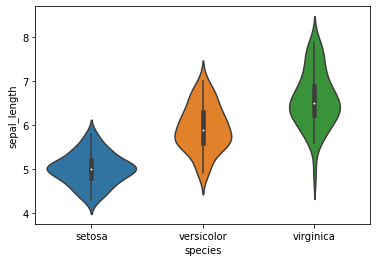

In [0]:
# Draw the normal violin plots 
sns.violinplot(x=df["species"], y=df["sepal_length"], split=False)

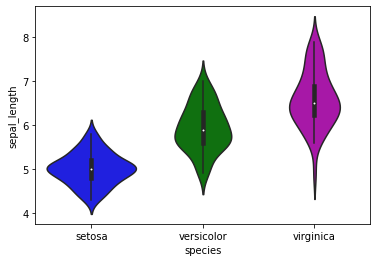

In [0]:
# Change the color of each group 
color_pallete = {"versicolor": "g", "setosa": "b", "virginica":"m"}
sns.violinplot(x=df["species"], y=df["sepal_length"], split=False, palette=color_pallete)
